# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [26]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [27]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 611


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [28]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&units={units}&q={city}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | port arthur
Processing Record 2 of Set 1 | petropavlovsk-kamchatsky
Processing Record 3 of Set 1 | bilibino
Processing Record 4 of Set 1 | fale old settlement
Processing Record 5 of Set 1 | kodinsk
Processing Record 6 of Set 1 | tindouf
Processing Record 7 of Set 1 | chibougamau
Processing Record 8 of Set 1 | taiohae
City not found. Skipping...
Processing Record 9 of Set 1 | port douglas
Processing Record 10 of Set 1 | college
Processing Record 11 of Set 1 | st. john's
Processing Record 12 of Set 1 | mascote
Processing Record 13 of Set 1 | olonkinbyen
Processing Record 14 of Set 1 | albany
Processing Record 15 of Set 1 | raghunathpur
Processing Record 16 of Set 1 | brezina
Processing Record 17 of Set 1 | cururupu
Processing Record 18 of Set 1 | buta
Processing Record 19 of Set 1 | midland
Processing Record 20 of Set 1 | ketchikan
Processing Record 21 of Set 1 | udachny
Processing Record 22 of Set

Processing Record 40 of Set 4 | east london
Processing Record 41 of Set 4 | san ignacio
Processing Record 42 of Set 4 | newman
Processing Record 43 of Set 4 | banda aceh
Processing Record 44 of Set 4 | ola
Processing Record 45 of Set 4 | antofagasta
Processing Record 46 of Set 4 | huarmey
Processing Record 47 of Set 4 | sao joao da barra
Processing Record 48 of Set 4 | kiruna
Processing Record 49 of Set 4 | polyarnyy
Processing Record 0 of Set 5 | kulhudhuffushi
Processing Record 1 of Set 5 | hamilton
Processing Record 2 of Set 5 | inderbor
Processing Record 3 of Set 5 | enewetak
Processing Record 4 of Set 5 | acapulco de juarez
Processing Record 5 of Set 5 | cable beach
City not found. Skipping...
Processing Record 6 of Set 5 | quelimane
Processing Record 7 of Set 5 | eyl
Processing Record 8 of Set 5 | susuman
Processing Record 9 of Set 5 | choma
Processing Record 10 of Set 5 | tolanaro
Processing Record 11 of Set 5 | puerto deseado
Processing Record 12 of Set 5 | crieff
Processing Re

Processing Record 35 of Set 8 | phang nga
Processing Record 36 of Set 8 | jining
Processing Record 37 of Set 8 | yueyang
Processing Record 38 of Set 8 | cherepovets
Processing Record 39 of Set 8 | badiyah
Processing Record 40 of Set 8 | cacheu
Processing Record 41 of Set 8 | bridgewater
Processing Record 42 of Set 8 | tsiombe
Processing Record 43 of Set 8 | laguna
Processing Record 44 of Set 8 | djibo
Processing Record 45 of Set 8 | shushtar
Processing Record 46 of Set 8 | tura
Processing Record 47 of Set 8 | pobe
Processing Record 48 of Set 8 | georgetown
Processing Record 49 of Set 8 | masvingo
Processing Record 0 of Set 9 | bonga
Processing Record 1 of Set 9 | balabac
Processing Record 2 of Set 9 | ploudalmezeau
Processing Record 3 of Set 9 | lata
Processing Record 4 of Set 9 | taulaga
Processing Record 5 of Set 9 | embi
Processing Record 6 of Set 9 | aginskoye
Processing Record 7 of Set 9 | hadibu
Processing Record 8 of Set 9 | maridi
Processing Record 9 of Set 9 | kirando
Processi

Processing Record 26 of Set 12 | nabire
Processing Record 27 of Set 12 | polatsk
Processing Record 28 of Set 12 | yekaterinoslavka
Processing Record 29 of Set 12 | fort-de-france
Processing Record 30 of Set 12 | beidao
Processing Record 31 of Set 12 | sumbe
Processing Record 32 of Set 12 | riyadh
Processing Record 33 of Set 12 | kamien pomorski
Processing Record 34 of Set 12 | iquitos
Processing Record 35 of Set 12 | qalat
Processing Record 36 of Set 12 | cadale
Processing Record 37 of Set 12 | savnik
City not found. Skipping...
Processing Record 38 of Set 12 | cuellar
Processing Record 39 of Set 12 | bandarbeyla
Processing Record 40 of Set 12 | revelstoke
Processing Record 41 of Set 12 | santa elena de uairen
Processing Record 42 of Set 12 | mil'kovo
Processing Record 43 of Set 12 | beberibe
Processing Record 44 of Set 12 | dapa
Processing Record 45 of Set 12 | dolores
Processing Record 46 of Set 12 | las lomas
Processing Record 47 of Set 12 | xilin hot
Processing Record 48 of Set 12 

In [29]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          590
Lat           590
Lng           590
Max Temp      590
Humidity      590
Cloudiness    590
Wind Speed    590
Country       590
Date          590
dtype: int64

In [30]:
# Display sample data
city_data_df.head()

City      Lat       Lng  Max Temp  Humidity  \
0               port arthur  38.8000  121.2667      6.12        66   
1  petropavlovsk-kamchatsky  53.0452  158.6483      0.33        73   
2                  bilibino  68.0546  166.4372    -15.31        94   
3       fale old settlement  -9.3852 -171.2468     28.86        69   
4                   kodinsk  58.6881   99.1844    -16.42        93   

   Cloudiness  Wind Speed Country        Date  
0          51       13.28      CN  1699493730  
1          20        9.39      RU  1699493446  
2         100        1.09      RU  1699493731  
3          93        4.84      TK  1699493731  
4          18        0.77      RU  1699493732

In [31]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [32]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

City      Lat       Lng  Max Temp  Humidity  \
City_ID                                                                    
0                     port arthur  38.8000  121.2667      6.12        66   
1        petropavlovsk-kamchatsky  53.0452  158.6483      0.33        73   
2                        bilibino  68.0546  166.4372    -15.31        94   
3             fale old settlement  -9.3852 -171.2468     28.86        69   
4                         kodinsk  58.6881   99.1844    -16.42        93   

         Cloudiness  Wind Speed Country        Date  
City_ID                                              
0                51       13.28      CN  1699493730  
1                20        9.39      RU  1699493446  
2               100        1.09      RU  1699493731  
3                93        4.84      TK  1699493731  
4                18        0.77      RU  1699493732

### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

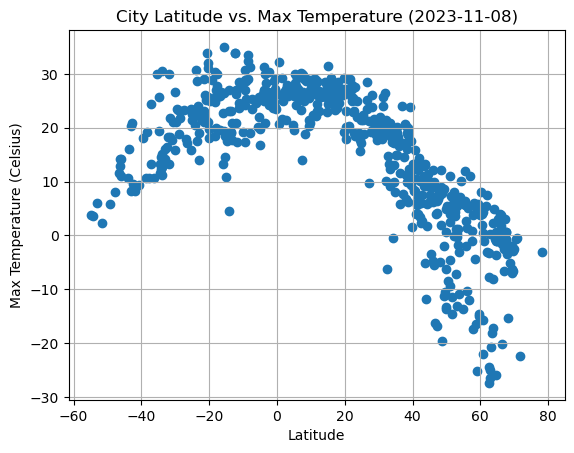

In [40]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], marker="o")

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (2023-11-08)")
plt.ylabel("Max Temperature (Celsius)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/WeatherPyFig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

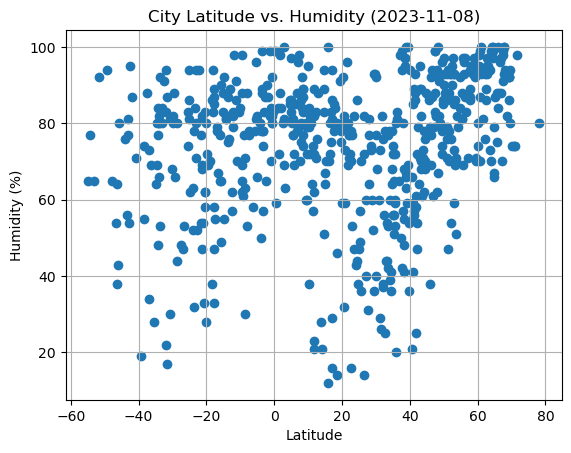

In [41]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], marker="o")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (2023-11-08)")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/WeatherPyFig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

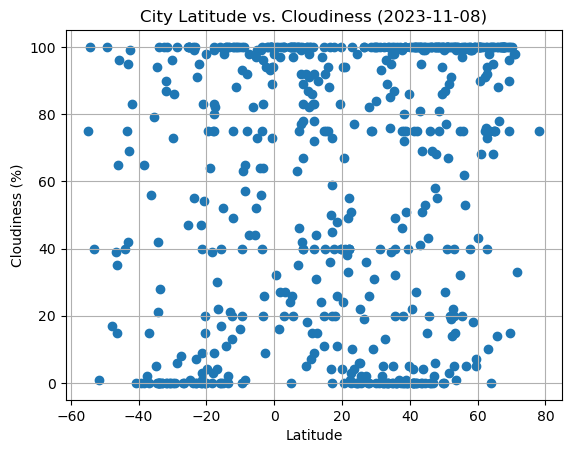

In [42]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], marker="o")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (2023-11-08)")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)


# Save the figure
plt.savefig("output_data/WeatherPyFig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

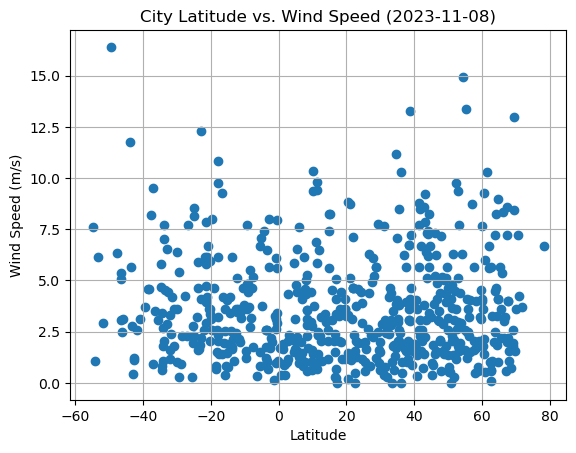

In [43]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], marker="o")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (2023-11-08)")
plt.ylabel("Wind Speed (m/s)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/WeatherPyFig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [44]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df

City      Lat       Lng  Max Temp  Humidity  \
City_ID                                                                    
0                     port arthur  38.8000  121.2667      6.12        66   
1        petropavlovsk-kamchatsky  53.0452  158.6483      0.33        73   
2                        bilibino  68.0546  166.4372    -15.31        94   
4                         kodinsk  58.6881   99.1844    -16.42        93   
5                         tindouf  27.6711   -8.1474     19.12        31   
...                           ...      ...       ...       ...       ...   
585                      xianning  29.8833  114.2167     18.49        92   
586                     port said  31.2565   32.2841     23.99        73   
587                          topi  34.0704   72.6236     17.28        39   
588                  arkhangel'sk  64.5401   40.5433      0.63        99   
589                       shimoda  34.6667  138.9500     19.20        64   

         Cloudiness  Wind Speed Country        Date  
City_ID                                              
0                51       13.28      CN  1699493730  
1                20        9.39      RU  1699493446  
2               100        1.09      RU  1699493731  
4                18        0.77      RU  1699493732  
5                 0        4.93      DZ  1699493732  
...             ...         ...     ...         ...  
585             100        2.01      CN  1699493942  
586              40        3.09      EG  1699493942  
587              85        1.87      PK  1699493942  
588             100        3.25      RU  1699493942  
589             100        3.85      JP  1699493943  

[409 rows x 9 columns]

In [45]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df

City      Lat       Lng  Max Temp  Humidity  \
City_ID                                                               
3        fale old settlement  -9.3852 -171.2468     28.86        69   
7               port douglas -16.4833  145.4667     26.57        67   
10                   mascote -15.5631  -39.3025     19.29        90   
15                  cururupu  -1.8283  -44.8683     25.06        87   
20                  waitangi -43.9535 -176.5597     10.74        76   
...                      ...      ...       ...       ...       ...   
556                   nabire  -3.3667  135.4833     28.29        78   
561                    sumbe -11.2061   13.8437     24.66        86   
564                  iquitos  -3.7481  -73.2472     25.02        88   
572                 beberibe  -4.1797  -38.1306     26.17        80   
574                  dolores -36.3132  -57.6792     10.69        69   

         Cloudiness  Wind Speed Country        Date  
City_ID                                              
3                93        4.84      TK  1699493731  
7                22        4.17      AU  1699493733  
10                0        0.84      BR  1699493733  
15              100        2.00      BR  1699493735  
20               40       11.78      NZ  1699493737  
...             ...         ...     ...         ...  
556              83        1.00      ID  1699493933  
561             100        3.19      AO  1699493934  
564              75        2.57      PE  1699493669  
572              64        7.40      BR  1699493937  
574              56        3.53      AR  1699493939  

[181 rows x 9 columns]

###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.7259231162086475


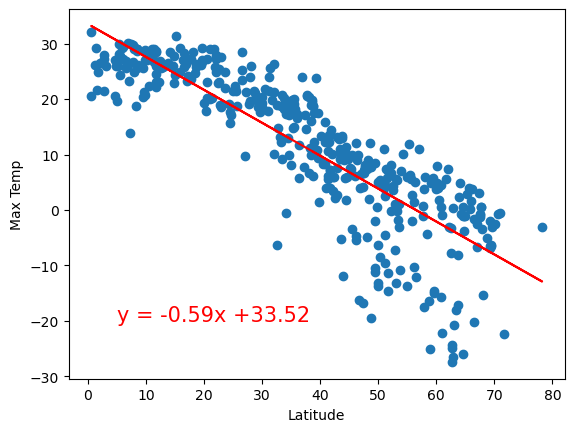

In [47]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Max Temp']

# Perform a linear regression on temperature vs. latitude for northern hemisphere
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Create Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.annotate(line_eq,(5, -20),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

The r-value is: 0.430758020327995


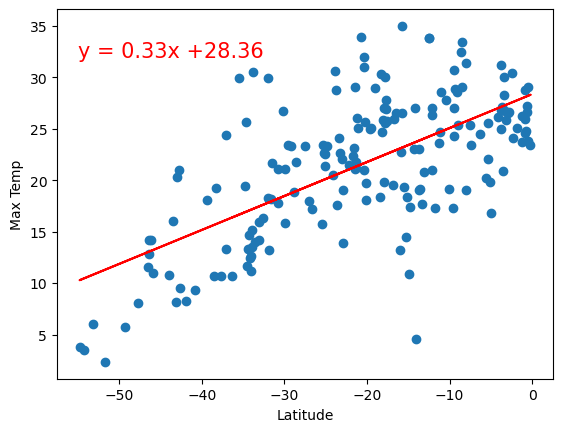

In [50]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Max Temp']

# Perform a linear regression on temperature vs. latitude for southern hemisphere
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Create Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.annotate(line_eq,(-55, 32),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

**Discussion about the linear relationship:** Weather data from the Northern Hemisphere presents a strong negative correlation. As latitude increases, the max temp decreases. The Southern Hemisphere displays a weaker but visible positive correlation that as the latitude increases, the max temp also increases. Together, the plots show the relationship with temperature and the Earth's equator. As the latitude nears the equator at 0 degrees, the temperature increases. 

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.07148930603870952


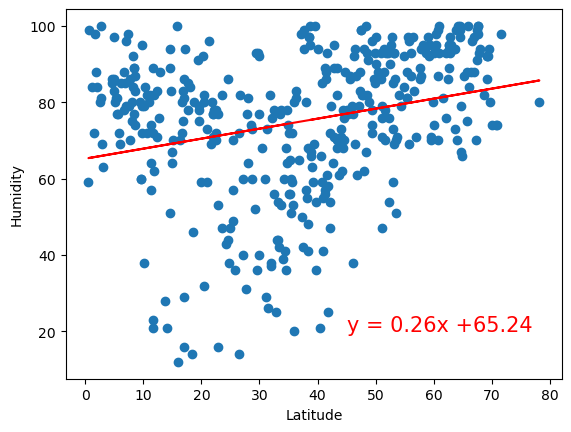

In [52]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Humidity']

# Perform a linear regression on humidity vs. latitude for northern hemisphere
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Create Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.annotate(line_eq,(45, 20),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

The r-value is: 0.05143638840619


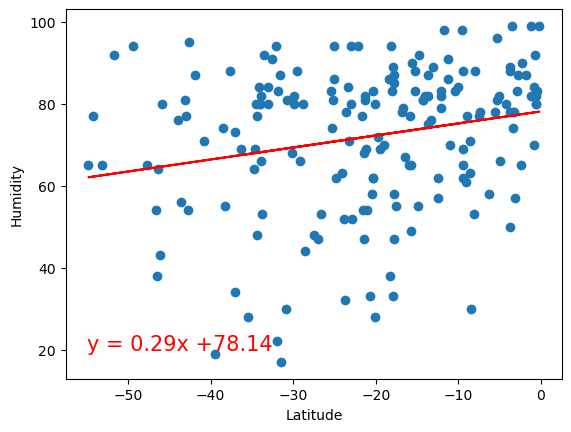

In [54]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Humidity']

# Perform a linear regression on humidity vs. latitude for southern hemisphere
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Create Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.annotate(line_eq,(-55, 20),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

**Discussion about the linear relationship:** Both hemispheres present weak r-values for the relationship between latitude and humidity. The data is very spread out in both cases, with little to no correlation displayed. Therefore, there is not a significant relationship between the two factors. 

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.027161478757317184


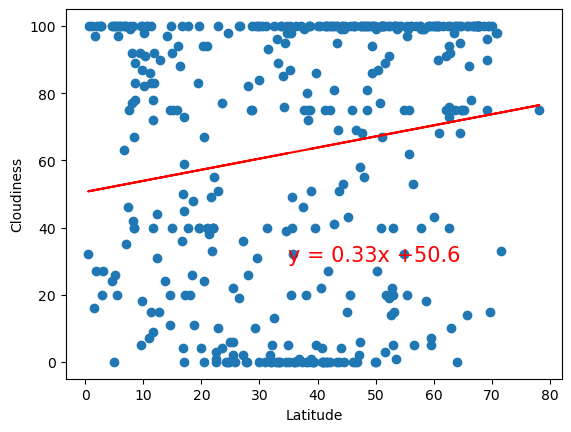

In [58]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Cloudiness']

# Perform a linear regression on cloudiness vs. latitude for northern hemisphere
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Create Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.annotate(line_eq,(35, 30),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

The r-value is: 0.06889743315009873


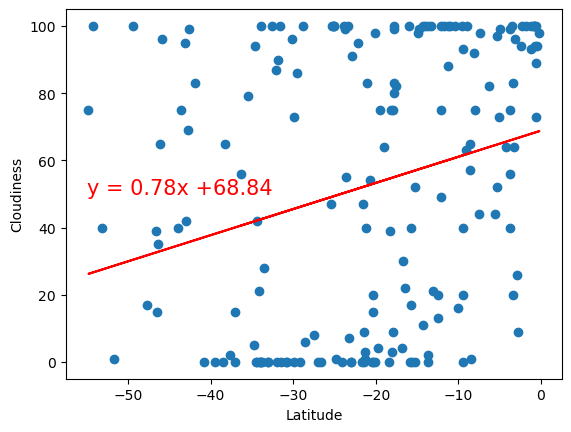

In [61]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Cloudiness']

# Perform a linear regression on cloudiness vs. latitude for southern hemisphere
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Create Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.annotate(line_eq,(-55, 50),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

**Discussion about the linear relationship:** Both hemispheres display positive slopes however, both r-values are relatively small. Each r-value is less than 0.1 indicating that there is no significant correlation between cloudiness and latitude. 

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.015425773100820083


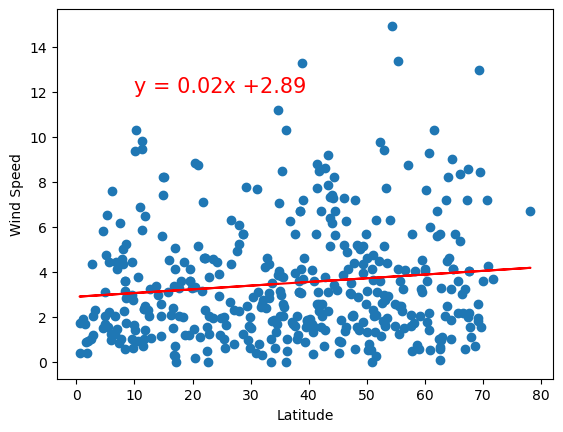

In [62]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Wind Speed']

# Perform a linear regression on cloudiness vs. latitude for northern hemisphere
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Create Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.annotate(line_eq,(10, 12),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

The r-value is: 0.021844791369301314


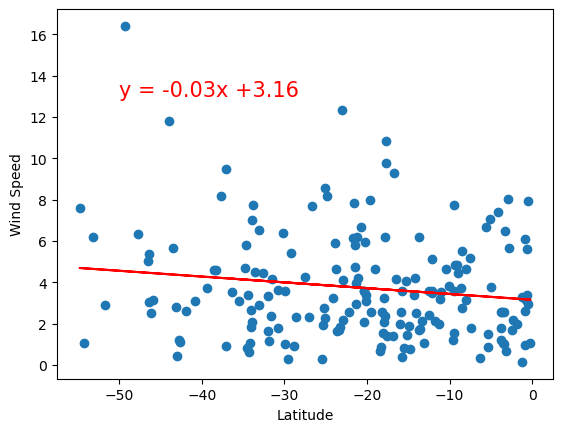

In [64]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Wind Speed']

# Perform a linear regression on cloudiness vs. latitude for southern hemisphere
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Create Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.annotate(line_eq,(-50, 13),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

**Discussion about the linear relationship:** Neither the Northern or Southern Hemisphere shows a strong correlation between wind speed and latitude. There's a very slight decrease in wind speed when you near the equator (latitude 0 degrees) but not enough to be significant. 